In [1]:
import django, sys, os
sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
import matplotlib.pyplot as plt
import random

Grieneisen: 349341, Haunschild: 391309, Total unique: 480974


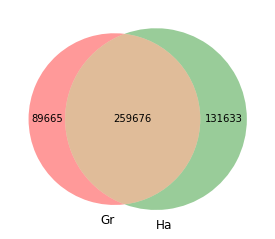

In [2]:
from matplotlib_venn import venn2

grin = set(Doc.objects.filter(query__pk=3769).values_list('pk', flat=True))
haun = set(Doc.objects.filter(query__pk=3905).values_list('pk', flat=True))

s1 = grin - haun
s2 = haun - grin
s3 = grin & haun
s4 = grin | haun

print(f"Grieneisen: {len(grin)}, Haunschild: {len(haun)}, Total unique: {len(s4)}")

venn2(subsets = (len(s1),len(s2),len(s3)), set_labels=('Gr','Ha'))

plt.show()

In [7]:
t2, created = Tag.objects.get_or_create(
    query = Query.objects.get(pk=3905),
    title = "haunschild_only_sample"
)
if created:
    for di in random.sample(s2,100):
        doc = Doc.objects.get(pk=di)
        doc.tag.add(tag)
    
tag.update_tag()
    

In [9]:
t1, created = Tag.objects.get_or_create(
    query = Query.objects.get(pk=3769),
    title = "grieneisen_only_sample"
)
if created:
    for di in random.sample(s1,100):
        doc = Doc.objects.get(pk=di)
        doc.tag.add(tag)
    
tag.update_tag()

In [10]:
t3, created = Tag.objects.get_or_create(
    query = Query.objects.get(pk=3905),
    title = "grieneisen_haunschild_sample"
)
if created:
    for di in random.sample(s3,100):
        doc = Doc.objects.get(pk=di)
        doc.tag.add(tag)
    
tag.update_tag()

Grieneisen: 349341, Haunschild: 391309, Total unique: 480974
0.8
0.113207547169811
0.92


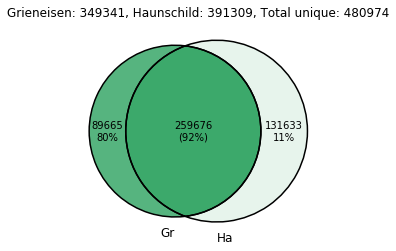

In [122]:
print(f"Grieneisen: {len(grin)}, Haunschild: {len(haun)}, Total unique: {len(s4)}")
from matplotlib_venn import venn2
import copy

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

v = venn2(
    subsets = (len(s1),len(s2),len(s3)), 
    set_labels=(f'Gr',f'Ha'),
)

v.get_label_by_id("10").set_text(f'{len(s1)}\n{t1.relevance:.0%}')
v.get_label_by_id("01").set_text(f'{len(s2)}\n{t2.relevance:.0%}')
v.get_label_by_id("11").set_text(f"{len(s3)}\n({t3.relevance:.0%})")

c1 = v.get_patch_by_id("10")
#c1.set_alpha(t1.relevance)



c2 = v.get_patch_by_id("11")
#c2.set_alpha(t3.relevance)



c3 = v.get_patch_by_id("01")
#c3.set_alpha(t2.relevance)

ts = [t1,t2,t3]


for i, c in enumerate(v.patches):
    print(ts[i].relevance)
    c.set_fc((44/255,162/255,95/255,ts[i].relevance))
    c.set_alpha(ts[i].relevance)
    c_cp = copy.copy(c)
    c_cp = ax.add_patch(c_cp)
    c_cp.set_fc("None")
    c_cp.set_alpha(1)
    c_cp.set_ec("black")
    c_cp.set_lw(1.5)

plt.title(f"Grieneisen: {len(grin)}, Haunschild: {len(haun)}, Total unique: {len(s4)}")

plt.savefig("../plots/grineisen_haunschild.png")
plt.show()